In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

plt.style.use("fivethirtyeight")

In [2]:
import os

os.chdir(r"D:\COSE\Open Data Playground\Hack4SDS\Hack4SDS")

jobs = pd.read_excel("Jobs.xlsx", header = 1)
contacts = pd.read_excel("Contacts.xlsx", header = 1)
job_applicants = pd.read_excel("Job Applicants.xlsx")

In [3]:
print("jobs n. columns", len(jobs.columns))
print("contacts n. columns", len(contacts.columns))
print("job applicants n. columns", len(job_applicants.columns))

jobs n. columns 39
contacts n. columns 56
job applicants n. columns 42


In [9]:
print("jobs len", len(jobs))
print("contacts len", len(contacts))
print("job applicants len", len(job_applicants))

jobs len 4590
contacts len 51539
job applicants len 71951


In [10]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)

In [11]:
merged_df = job_applicants.merge(contacts, left_on='AVTRRT__Contact_Candidate__c', right_on = 'Id', how='left')
merged_df2 = merged_df.merge(jobs, on = "Name", how = "left")

## Training and Test Split

In [12]:
# Cut the dataset in two pieces
train_merged = merged_df2[:52700].copy()
test_merged = merged_df2[52700:].copy()

In [13]:
train_merged_2 = train_merged.copy()

In [21]:
train_merged_2.Type_of_Studies__c_y

0         BSc;MSc;PhD
1             MSc;PhD
2        PhD;Post PhD
3                 NaN
4                 NaN
             ...     
52695             NaN
52696             NaN
52697             NaN
52698             NaN
52699             MSc
Name: Type_of_Studies__c_y, Length: 52700, dtype: object

### Imputation and (initial) Feature Selection

In [23]:
# Removing feature based on our assumptions (domain knowledge)
def preprocessing(dataframe):
    dataframe = dataframe.drop(columns=["IDnum", "Id_x", "OwnerId_x", "Name", "AVTRRT__Account_Job__c_x",
                                              "AVTRRT__Contact_Candidate__c", "AVTRRT__Experience__c_x", "AVTRRT__Job__c",
                                              "AVTRRT__Pay_Type__c_x", "AVTRRT__Resume__c_x", "AVTRRT__State__c", "Current_Role__c",
                                              "Relevant_Qualification__c", "Reason_for_leaving__c", "Overall_Experience__c",
                                              "Specific_Experience__c_x", "Current_Salary__c", "Current_Bonus__c", "Current_Benefits__c",
                                              "Notice_Period__c_x", "Contract_Level__c", "Language_01__c_x", "Language_02__c_x",
                                              "Level_Language_01__c_x", "Level_Language_02__c_x", "P_L_Responsability__c", "Profit_and_Loss_Resp__c",
                                              "International_experience__c", "Type_of_Studies__c_x", "Field_of_Studies__c_x", "Year_of_Birth__c",
                                              "AVTRRT__Job_Num__c", "Id_y", "AccountId", "RecordTypeId", "MailingCity", "MailingState",
                                              "Title", "OwnerId_y", "AVTRRT__Candidate_Id__c", "AVTRRT__Candidate_Short_List__c",
                                              "AVTRRT__Candidate_Summary__c", "AVTRRT__Candidate_Write_Up__c", "AVTRRT__Cover_Letter__c",
                                              "AVTRRT__Current_Pay__c", "AVTRRT__Desired_Pay_Range_From__c_y", "AVTRRT__Experience__c_y",
                                              "AVTRRT__Job_Title__c_y", "AVTRRT__Locations_1st_Choice__c", "AVTRRT__Pay_Type__c_y",
                                              "AVTRRT__Resume__c_y", "AVTRRT__Source__c", "Language_01__c_y", "Language_02__c_y",
                                              "Level_Language_01__c_y", "Level_Language_02__c_y", "Benefits__c_x",
                                              "Desired_companies__c", "Bonus__c", "Reason_for_Leaving__c", "Type_of_Experience__c",
                                              "Tot_Experience__c", "Team_Leading_Responsibility__c_y", "P_L_Responsibility__c", "International_Experience__c",
                                              "Notice_Period__c_y", "CCNL__c", "Specialisation_Industry__c", "CCNL_Level__c", "Unnamed: 55",
                                              "Id", "OwnerId", "AVTRRT__Account_Job__c_y", "AVTRRT__Closed_Qualifiers__c", "AVTRRT__Closed__c",
                                              "AVTRRT__Desired_Pay_Range_From__c_x", "AVTRRT__Type__c", "MailingCountry", "Language_03__c", "Level_Language_03__c", 
                                              "Area_of_interest_b__c", "AVTRRT__Job_Category__c", "AVTRRT__Job_Country__c",	"AVTRRT__Job_Description__c", "AVTRRT__Job_Summary__c",
                                               "AVTRRT__Job_Term__c", "AVTRRT__Job_Title__c", "AVTRRT__Number_of_Applicants__c", "AVTRRT__Education_Details__c",
                                               "AVTRRT__City__c", "AVTRRT__Job_Title__c_x", "AVTRRT__Stage__c_y", "AVTRRT__Number_of_Interviews__c",
                                               "Job_Type__c", "OSN_Practice_Focus__c", "Type_of_contract__c",  "Fix_Salary__c", "Location__c", "Travel__c",
                                               "Variable_Bonus__c", "Commission_Fee__c", "Languages__c", "Language_02__c", "Level_Language_01__c",
                                               "Level_Language_02__c", "Daily_Rate__c", "Benefits__c_y", "OSN_Practice__c", "AVTRRT__Hired_Date__c",
                                               "Reason_for_requisition__c", "Competitors__c", "Specific_Experience__c_y", "Specific_Experience__c",
                                              "AVTRRT__Experience__c", "AVTRRT__Number_of_Positions__c", "Project_Management__c", "AVTRRT__Experience__c",
                                              "Specific_Experience__c", "Team_Leading__c", " ", "AVTRRT__Previous_Titles__c", "Team_Leading_Responsibility__c_x",
                                              "AVTRRT__Percentage_of_Travel__c_x", "AVTRRT__AutoPopulated_Skills__c",
                                              "AVTRRT__AutoPopulate_Skillset__c", "AVTRRT__General_Competency__c", "AVTRRT__General_Job_Category_Sought__c",
                                              "AVTRRT__IT_Competency__c", "AVTRRT__Other_Competency__c", "Type_of_Contract__c"])

    return dataframe

In [22]:
def full_imputation(dataframe):
    from sklearn.impute import SimpleImputer


    # Non_Compete_Agreements__c
    for index in dataframe.Non_Compete_Agreements__c.index.to_list():
        value = dataframe.loc[index, "Non_Compete_Agreements__c"]

        if pd.isnull(value) or value == "No":
                dataframe.loc[index, "Non_Compete_Agreements__c"] = "0"
        else:
                dataframe.loc[index, "Non_Compete_Agreements__c"] = "1"

    dataframe["Non_Compete_Agreements__c"] = dataframe["Non_Compete_Agreements__c"].astype("int")
    print("Non_Compete_Agreements__c (1/12)")


    # AVTRRT__Open_For_Relocation__c
    values = [0.0, 1.0]
    probabilities = [0.962, 0.038]
    for index in dataframe[dataframe.AVTRRT__Open_For_Relocation__c.isnull()].index.to_list():
        n = np.random.choice(values, p=probabilities)
        dataframe.loc[index, "AVTRRT__Open_For_Relocation__c"] = n
    print("AVTRRT__Open_For_Relocation__c (7/12)")
    


    # AVTRRT__Percentage_of_Travel__c_y
    imputer = SimpleImputer(strategy = "median")
    dataframe["AVTRRT__Percentage_of_Travel__c_y"] = imputer.fit_transform(dataframe[["AVTRRT__Percentage_of_Travel__c_y"]])
    dataframe.AVTRRT__Percentage_of_Travel__c_y = dataframe.AVTRRT__Percentage_of_Travel__c_y / 100
    print("AVTRRT__Percentage_of_Travel__c_y (9/12)")



    # Field_of_Studies__c_y
    imputer = SimpleImputer(strategy = 'constant', fill_value = 'Other')
    dataframe["Field_of_Studies__c_y"] = imputer.fit_transform(dataframe[["Field_of_Studies__c_y"]])
    encoded_df = pd.get_dummies(dataframe["Field_of_Studies__c_y"])
    dataframe = pd.concat([dataframe, encoded_df], axis=1)
    dataframe = dataframe.drop(columns="Field_of_Studies__c_y")
    print("Field_of_Studies__c_y (10/12)")



    # Relocation__c
    for index in dataframe.Relocation__c.index.to_list():
        value = dataframe.loc[index, "Relocation__c"]

        if pd.isnull(value) or value == "No":
                dataframe.loc[index, "Relocation__c"] = "0"
        else:
                dataframe.loc[index, "Relocation__c"] = "1"

    dataframe["Relocation__c"] = dataframe["Relocation__c"].astype("int")
    print("Relocation__c (11/12)")



    # Type_of_Studies__c_y
    imputer = SimpleImputer(strategy = 'constant', fill_value = 'Other')
    dataframe["Type_of_Studies__c_y"] = imputer.fit_transform(dataframe[["Type_of_Studies__c_y"]])

    value_mapping = {
        "Other": 0,
        "High School": 0,
        "BSc": 1,
        "MSc": 2,
        "PhD": 3,
        "Post PhD": 3.5,
        "1 year Master": 0.7,
        "2 years Master": 1.5,
        "MBA": 3.5,
        "Double Degree": 1.5,
        "MBA Executive": 2,
    }
    dataframe["Type_of_Studies__c_y"] = dataframe["Type_of_Studies__c_y"].str.split(";").apply(lambda x: sum(value_mapping[val] for val in x))
    print("Type_of_Studies__c_y (12/12)")
    print(f"\n\n {len(dataframe.columns)}/88 (SHOULD BE 88)")


    dataframe.info()
    return dataframe

In [24]:
train_merged_2 = preprocessing(train_merged_2)

In [28]:
train_merged_2

,AVTRRT__Relocation__c,AVTRRT__Stage__c_x,Non_Compete_Agreements__c,AVTRRT__Open_For_Relocation__c,AVTRRT__Percentage_of_Travel__c_y,Field_of_Studies__c_y,Relocation__c,Type_of_Studies__c_y
0,0,1.0,NaN,0.0,100.0,Computer Science,Yes,BSc;MSc;PhD
1,0,1.0,NaN,0.0,100.0,Economics,Yes,MSc;PhD
2,0,1.0,NaN,0.0,100.0,Physics,Yes,PhD;Post PhD
3,0,2.0,NaN,0.0,NaN,NaN,NaN,NaN
4,0,1.0,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
52695,0,1.0,NaN,0.0,NaN,NaN,NaN,NaN
52696,0,1.0,NaN,0.0,NaN,NaN,NaN,NaN
52697,1,1.0,NaN,1.0,100.0,NaN,NaN,NaN
52698,0,1.0,NaN,0.0,NaN,NaN,NaN,NaN


In [29]:
only_0_or_1 = train_merged_2[~(train_merged_2["AVTRRT__Stage__c_x"] == 2.0)].copy()
df_final = only_0_or_1.copy()
print(f"{len(df_final)/len(train_merged_2)} (SHOULD BE 0.6873)")

0.6873055028462998 (SHOULD BE 0.6873)


In [37]:
df_final2 = full_imputation(df_final)

Non_Compete_Agreements__c (1/12)
AVTRRT__Open_For_Relocation__c (7/12)
AVTRRT__Percentage_of_Travel__c_y (9/12)
Field_of_Studies__c_y (10/12)
Relocation__c (11/12)
Type_of_Studies__c_y (12/12)


 25/88 (SHOULD BE 88)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 36221 entries, 0 to 52699
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   AVTRRT__Relocation__c              36221 non-null  int64  
 1   AVTRRT__Stage__c_x                 36221 non-null  float64
 2   Non_Compete_Agreements__c          36221 non-null  int32  
 3   AVTRRT__Open_For_Relocation__c     36221 non-null  float64
 4   AVTRRT__Percentage_of_Travel__c_y  36221 non-null  float64
 5   Relocation__c                      36221 non-null  int32  
 6   Type_of_Studies__c_y               36221 non-null  float64
 7   Arts & Humanities                  36221 non-null  uint8  
 8   Biology                      

In [38]:
len(df_final2.columns)

25

In [39]:
df_final3 = df_final2.copy()

In [70]:
# Unbalanced classes check
df_final3.AVTRRT__Stage__c_x.value_counts() / len(df_final3)

1.0    0.78725
0.0    0.21275
Name: AVTRRT__Stage__c_x, dtype: float64

In [52]:
df_final3.head()

,AVTRRT__Relocation__c,AVTRRT__Stage__c_x,Non_Compete_Agreements__c,AVTRRT__Open_For_Relocation__c,AVTRRT__Percentage_of_Travel__c_y,Relocation__c,Type_of_Studies__c_y,Arts & Humanities,Biology,Business Management,Chemistry,Communication & Marketing,Computer Science,Economics,Engeneering,Engineering,Finance,Information Engineering,Law,Mathematics,Medicine,Other,Physics,Social & Political Sciences,Statistics
0,0,1.0,1,0.0,0.0001,1,6.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1.0,1,0.0,0.0001,1,5.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1.0,1,0.0,0.0001,1,6.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1.0,1,0.0,0.0001,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0,1.0,1,0.0,0.0001,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [85]:
# Train and test set
from sklearn.model_selection import train_test_split

X = df_final3.drop(columns = "AVTRRT__Stage__c_x").copy()
y = df_final3["AVTRRT__Stage__c_x"].copy()

# Reproducibility
np.random.seed(42)

# Since our output is unbalanced, we select the stratify option
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.18, random_state = 42)

In [126]:
# Checking the ohe
print(len(X_train.columns))
print(len(X_val.columns))
print(len(X_test.columns))

23
23
23


In [86]:
# Check the stratification for the training set:
y_train.value_counts()/len(y_train)


# correct

1.0    0.786658
0.0    0.213342
Name: AVTRRT__Stage__c_x, dtype: float64

In [87]:
# Check the stratification for the validation set:
y_val.value_counts()/len(y_val)


# correct

1.0    0.789877
0.0    0.210123
Name: AVTRRT__Stage__c_x, dtype: float64

In [88]:
# Check the stratification for the test set:
y_test.value_counts()/len(y_test)


# correct

1.0    0.787302
0.0    0.212698
Name: AVTRRT__Stage__c_x, dtype: float64

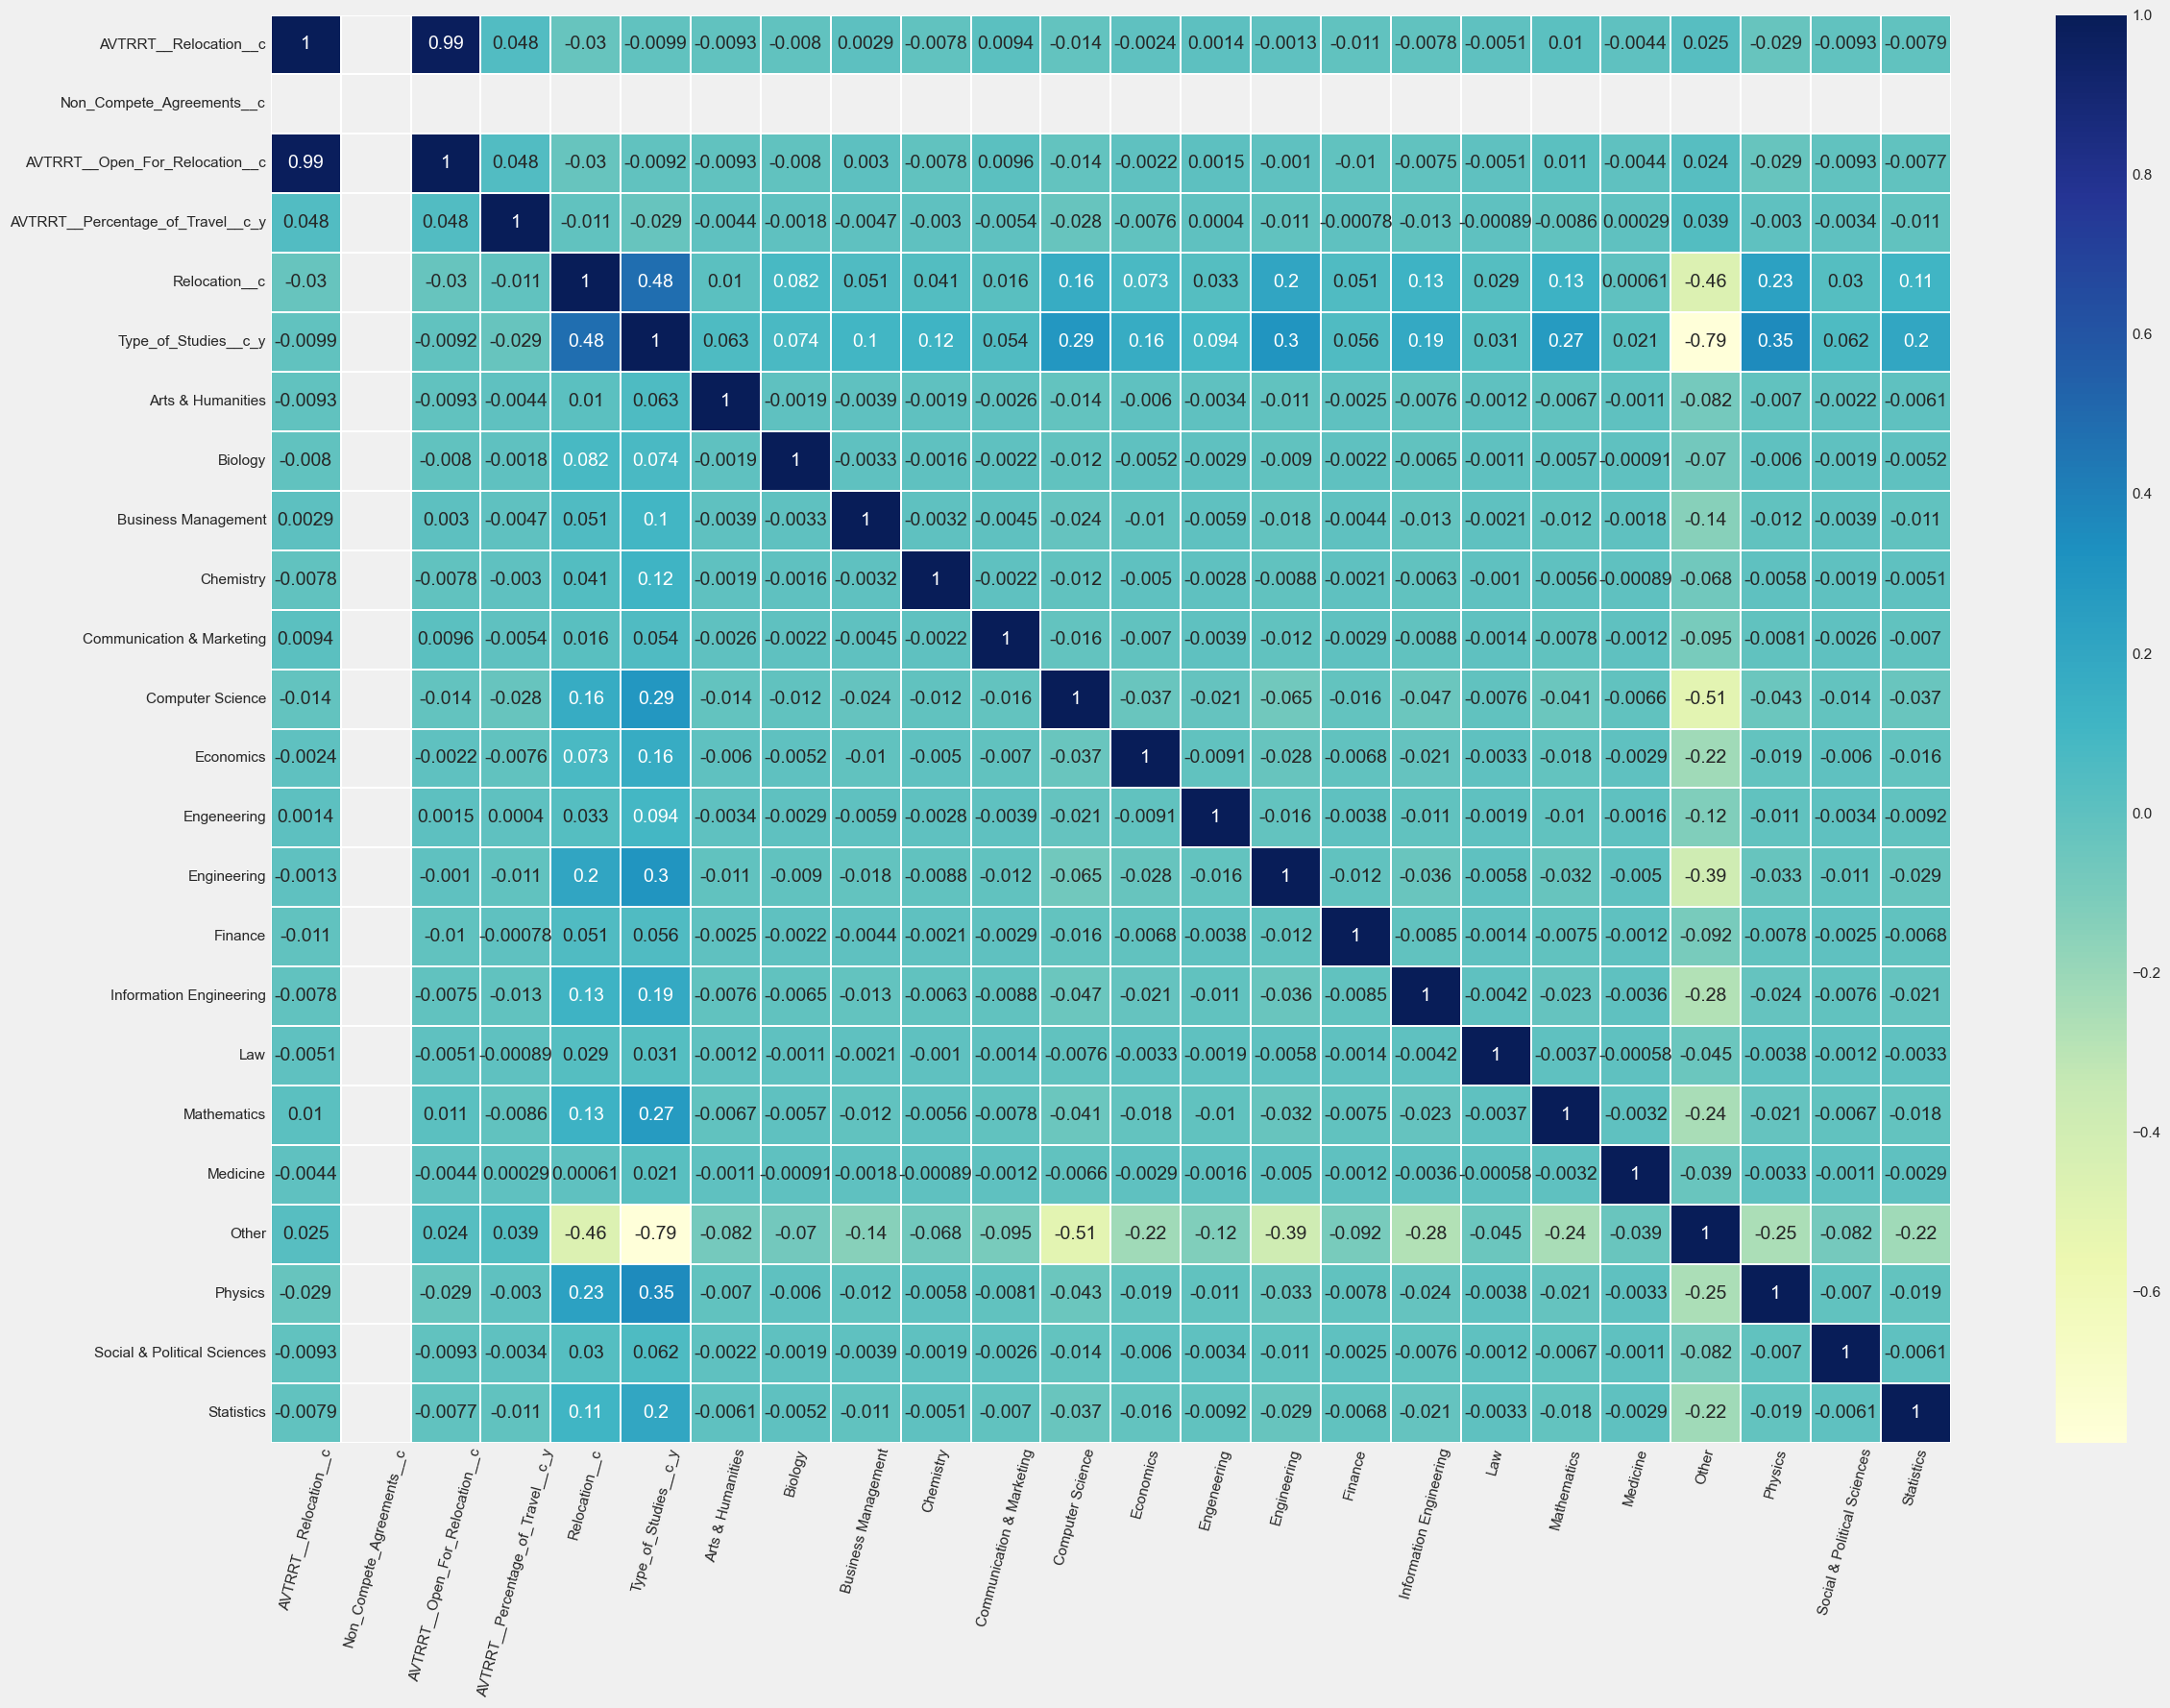

In [108]:
# Correlation matrix
corr_matrix = X_train.corr(numeric_only = True)

plt.figure(figsize = (25, 18))
sns.heatmap(corr_matrix, annot = True, linewidths = 0.1, cmap = "YlGnBu")

plt.xticks(rotation = 75)

plt.tight_layout()
plt.show()

Spurious correlation among 'Type_of_Studies__c_y', 'Other' and 'Relocation__c'. Positive correlation among 'AVTRRT__Relocation__c' and 'AVTRRT__Open_for_relocation__c'

In [109]:
def correlation(df):
    df = df.drop(columns = "AVTRRT__Open_For_Relocation__c")

    return df

In [114]:
X_train = correlation(X_train)
X_val = correlation(X_val)
X_test = correlation(X_test)

Text(0.5, 1.0, 'Visualizing Feature Importances')

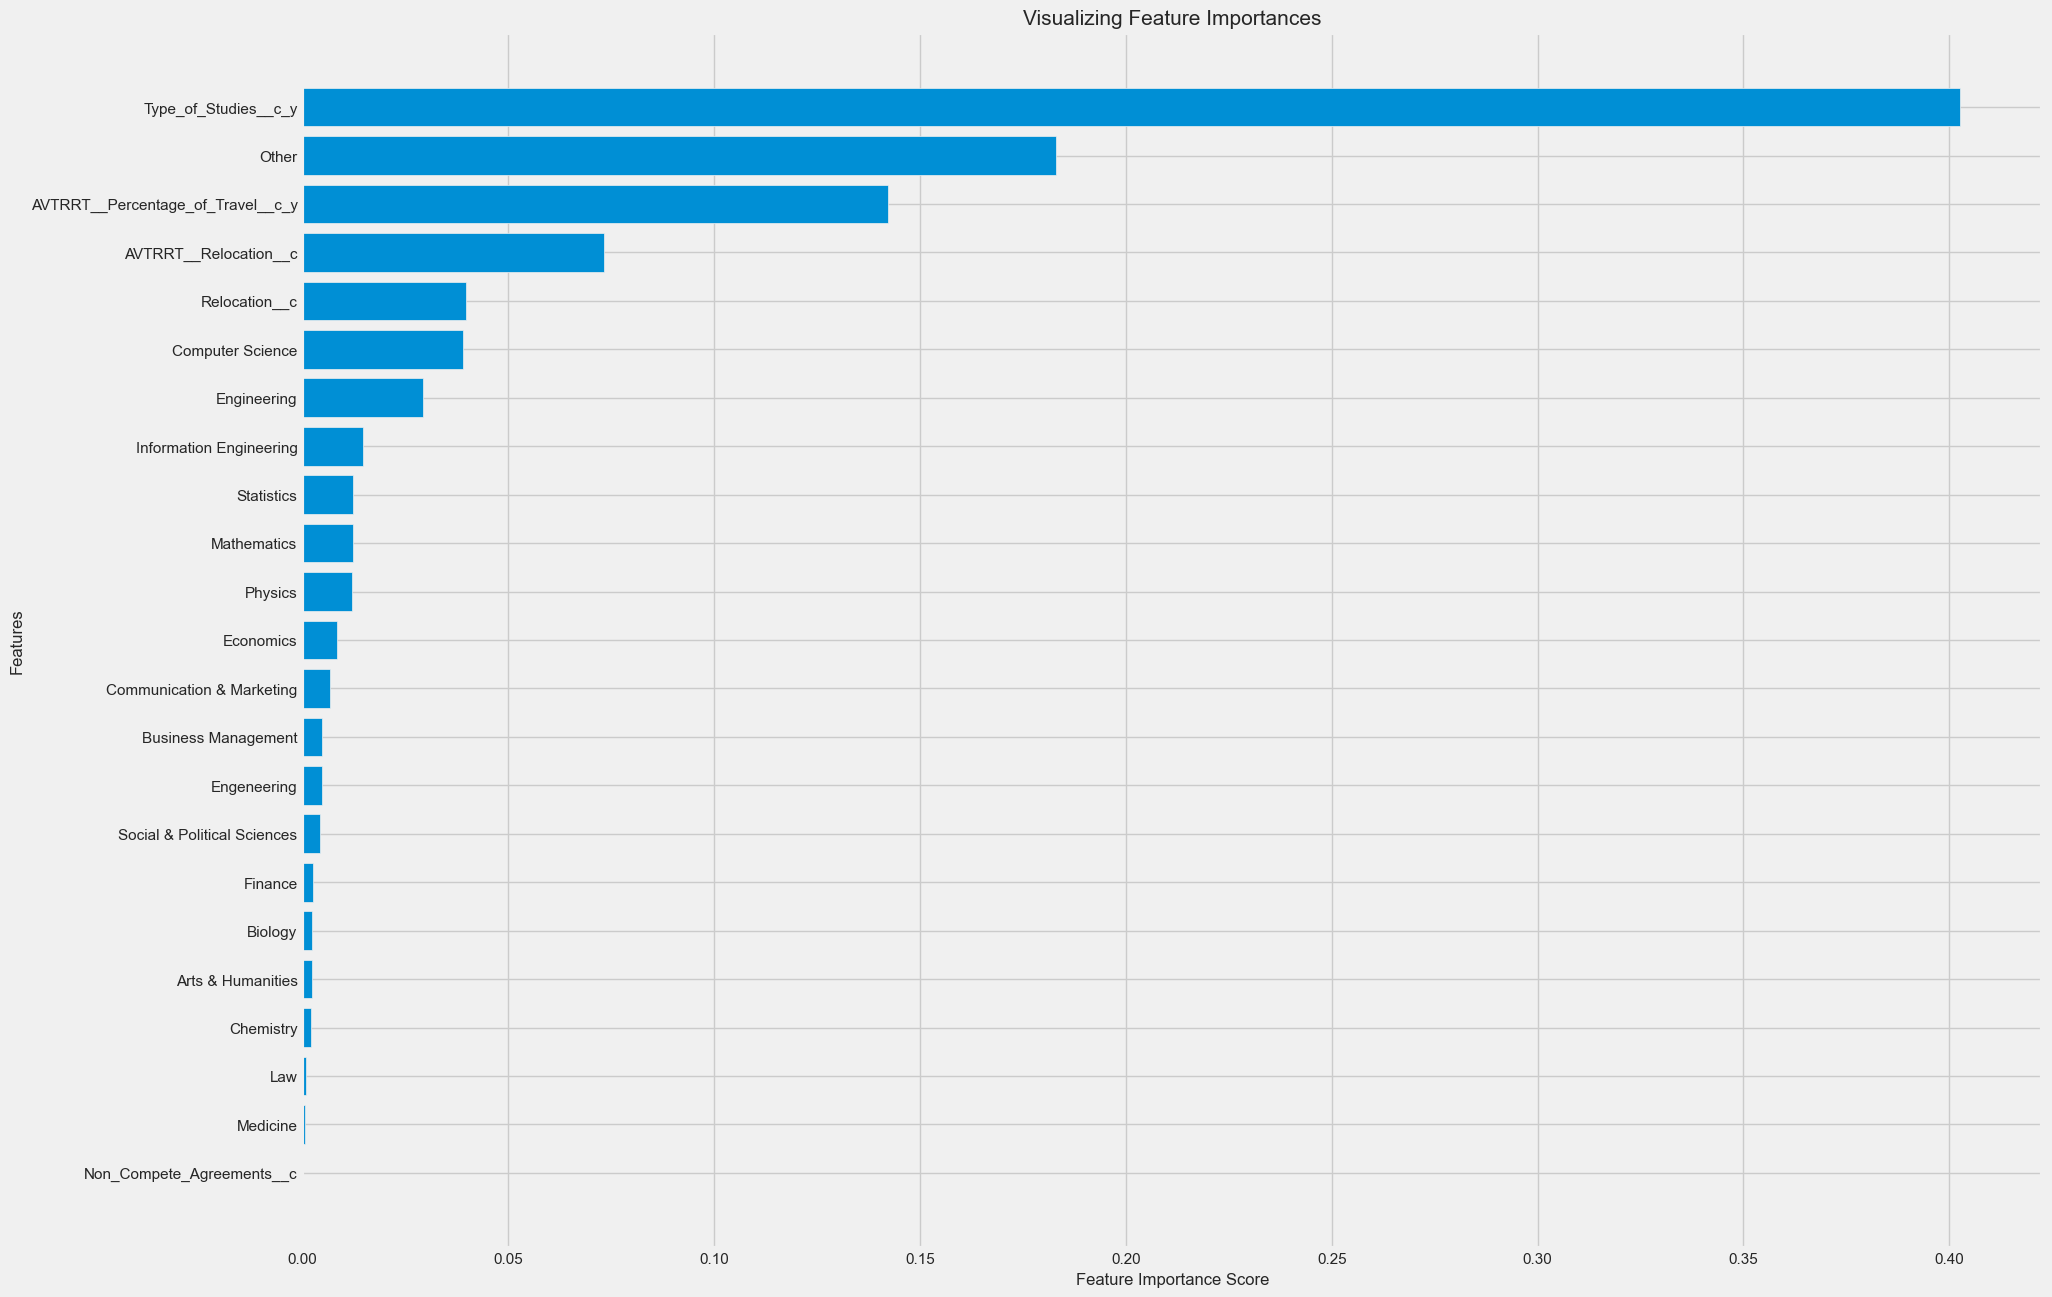

In [118]:
# Making the feature importances plot using "forest" (all features)
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 100, random_state = 42)

# Training the model
random_forest.fit(X_train, y_train)


plt.figure(figsize = (20, 15))

# Fitting the estimator on the entire training set
random_forest.fit(X_train, y_train)

feature_imp = pd.Series(random_forest.feature_importances_, 
                        index = X_train.columns).sort_values(ascending = True)

plt.barh(feature_imp.index, feature_imp)
plt.xlabel('Feature Importance Score', fontsize = 12)
plt.ylabel('Features', fontsize = 12)
plt.title("Visualizing Feature Importances", fontsize = 15)

In [119]:
# Trying to mprove the performance of the algorithm through the
# "Recursive feature elimination (with cross-validation)" algorithm (RFECV)

from sklearn.feature_selection import RFECV
from sklearn.metrics import average_precision_score
from sklearn.model_selection import StratifiedKFold


# Save the feature names in a list
lista = list(feature_imp.index)

# Create RFECV instance
stratified_kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)
rfecv = RFECV(estimator = random_forest, step = 1, cv = stratified_kfold, scoring = 'f1')

# Fit the RFECV instance on the training data
rfecv.fit(X_train, y_train)

# Print the optimal number of features
print("Optimal number of features: %d" % rfecv.n_features_)

# Print the selected features
selected_features = [feature for i, feature in enumerate(X_train.columns) if rfecv.support_[i]]
print("Selected features:", selected_features)

Optimal number of features: 1
Selected features: ['Type_of_Studies__c_y']


In [131]:
len(X_train[selected_features])

23760

In [132]:
len(y_train)

23760

{'accuracy': 0.7898773006134969, 'precision': 0.7898773006134969, 'recall': 1.0, 'f1': 0.882604970008569}


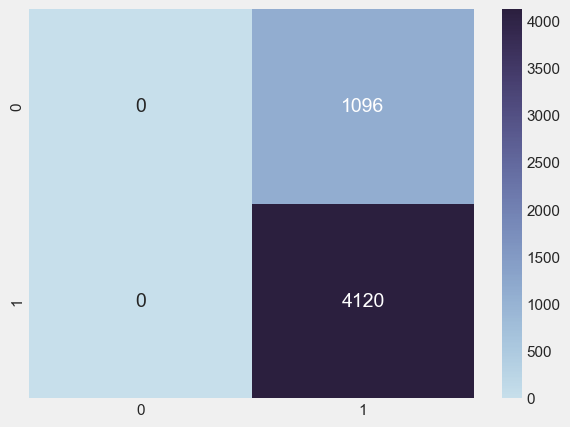

In [133]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rfecv_random_forest = RandomForestClassifier(n_estimators = 100, random_state = 42)

rfecv_random_forest.fit(X_train[selected_features], y_train)

# Testing the model on the validation set
y_pred = rfecv_random_forest.predict(X_val[selected_features])

cm = confusion_matrix(y_val, y_pred)

# plot the heatmap
sns.heatmap(cm, annot = True, cmap = sns.color_palette('ch:s=.25,rot=-.25', as_cmap = True), fmt = 'g')

# Save the results in a dictionary
results = {}
results["accuracy"] = accuracy_score(y_val, y_pred)
results["precision"] = precision_score(y_val, y_pred)
results["recall"] = recall_score(y_val, y_pred)
results["f1"] = f1_score(y_val, y_pred)
print(results)

{'accuracy': 0.7894938650306749, 'precision': 0.7904652056901191, 'recall': 0.9980582524271845, 'f1': 0.8822141171422441}


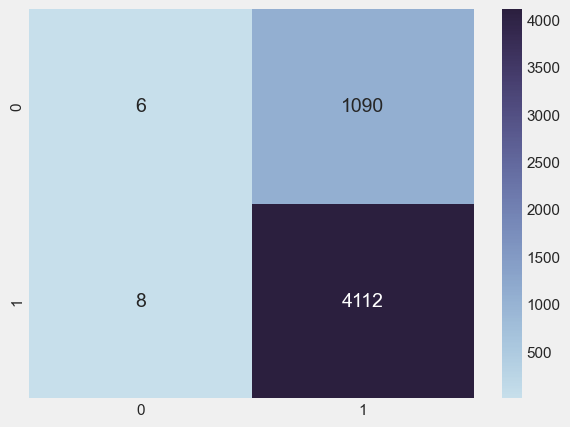

In [134]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Testing the model on the validation set
y_pred = random_forest.predict(X_val)

cm = confusion_matrix(y_val, y_pred)

# plot the heatmap
sns.heatmap(cm, annot = True, cmap = sns.color_palette('ch:s=.25,rot=-.25', as_cmap = True), fmt = 'g')

# Save the results in a dictionary
results = {}
results["accuracy"] = accuracy_score(y_val, y_pred)
results["precision"] = precision_score(y_val, y_pred)
results["recall"] = recall_score(y_val, y_pred)
results["f1"] = f1_score(y_val, y_pred)
print(results)



# As expected, the model with more features tend to generalize better

### Export to a .csv file

In [76]:
test_merged_2 = test_merged.copy()

In [77]:
test_merged_2 = preprocessing(test_merged_2)

In [78]:
df_final_test = full_imputation(test_merged_2)

Non_Compete_Agreements__c (1/12)
AVTRRT__Open_For_Relocation__c (7/12)
AVTRRT__Percentage_of_Travel__c_y (9/12)
Field_of_Studies__c_y (10/12)
Relocation__c (11/12)
Type_of_Studies__c_y (12/12)


 25/88 (SHOULD BE 88)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19251 entries, 52700 to 71950
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   AVTRRT__Relocation__c              19251 non-null  int64  
 1   AVTRRT__Stage__c_x                 0 non-null      float64
 2   Non_Compete_Agreements__c          19251 non-null  int32  
 3   AVTRRT__Open_For_Relocation__c     19251 non-null  float64
 4   AVTRRT__Percentage_of_Travel__c_y  19251 non-null  float64
 5   Relocation__c                      19251 non-null  int32  
 6   Type_of_Studies__c_y               19251 non-null  float64
 7   Arts & Humanities                  19251 non-null  uint8  
 8   Biology                  

In [79]:
len(df_final_test.columns)

25

In [80]:
df_final_test.head()

,AVTRRT__Relocation__c,AVTRRT__Stage__c_x,Non_Compete_Agreements__c,AVTRRT__Open_For_Relocation__c,AVTRRT__Percentage_of_Travel__c_y,Relocation__c,Type_of_Studies__c_y,Arts & Humanities,Biology,Business Management,Chemistry,Communication & Marketing,Computer Science,Economics,Engeneering,Engineering,Finance,Information Engineering,Law,Mathematics,Medicine,Other,Physics,Social & Political Sciences,Statistics
52700,0,NaN,0,0.0,1.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
52701,1,NaN,0,1.0,1.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
52702,0,NaN,0,0.0,1.0,0,2.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
52703,0,NaN,0,0.0,1.0,0,2.7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
52704,0,NaN,0,0.0,1.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [82]:
# Remove AVTRRT__Stage__c_x
df_final_test.drop(columns = "AVTRRT__Stage__c_x", inplace = True)

In [83]:
y_pred_test = random_forest.predict(df_final_test)

In [84]:
y_pred_test

array([1., 1., 1., ..., 1., 1., 1.])

In [175]:
df = pd.DataFrame(y_pred_test)

# Export the DataFrame to a CSV file
filename = 'data.csv'
df.to_csv(filename, index = False)

print(f"DataFrame has been exported to '{filename}' as a CSV file.")

DataFrame has been exported to 'data.csv' as a CSV file.
